Aluno: Joel Campos Teixeira
----------------------------
Formação em Ciência de Dados
-----------------------------

In [23]:
## aplicação do algoritmo de naive bayes para previsão de credito para clientes em um banco

In [3]:
#importando as bibliotecas 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [4]:
#carregando os dados
data= pd.read_csv('Credit.csv')
data.shape

(1000, 21)

In [5]:
data.head() # analisando a planilha 

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [6]:
#FORMANDO AS MATRIZES 
previsores = data.iloc[:,0:20].values # separando os dados previsores
classe = data.iloc[:,20].values # separando a classe de avaliação 

In [ ]:
# Agora precisamos transformar os atributos categoricos de previsão em atributos numericos ,passando o indice de cada coluna categorica
#Para isso precisamos criar um objeto para cada atributo categorico,para posteriormente 
#executarmos o encodding para o registro de teste

In [14]:
#criamos o objeto Label encoder  e passamos o dado categorico para ser transformado
lbencoder1 = LabelEncoder()
previsores[:,0] = lbencoder1.fit_transform(previsores[:,0]) # pegamos a coluna checking_status

lbencoder2 = LabelEncoder()
previsores[:,2] = lbencoder2.fit_transform(previsores[:,2]) # pegamos a coluna credit_history

lbencoder3 = LabelEncoder()
previsores[:,3] = lbencoder3.fit_transform(previsores[:,3]) # pegamos a coluna purpose

lbencoder5 = LabelEncoder()
previsores[:,5] = lbencoder5.fit_transform(previsores[:,5]) # pegamos a coluna savings_status

lbencoder6 = LabelEncoder()
previsores[:,6] = lbencoder6.fit_transform(previsores[:,6])# pegamos a coluna personal_status

lbencoder8 = LabelEncoder()
previsores[:,8] = lbencoder8.fit_transform(previsores[:,8]) # pegamos a coluna savings_status

lbencoder9 = LabelEncoder()
previsores[:,9] = lbencoder9.fit_transform(previsores[:,9]) # pegamos a coluna savings_status

lbencoder11 = LabelEncoder()
previsores[:,11] = lbencoder11.fit_transform(previsores[:,11]) # pegamos a coluna savings_status

lbencoder13 = LabelEncoder()
previsores[:,13] = lbencoder13.fit_transform(previsores[:,13]) # pegamos a coluna savings_status

lbencoder14 = LabelEncoder()
previsores[:,14] = lbencoder14.fit_transform(previsores[:,14]) # pegamos a coluna savings_status

lbencoder16 = LabelEncoder()
previsores[:,16] = lbencoder16.fit_transform(previsores[:,16]) # pegamos a coluna savings_status

lbencoder18 = LabelEncoder()
previsores[:,18] = lbencoder18.fit_transform(previsores[:,18]) # pegamos a coluna savings_status

lbencoder19 = LabelEncoder()
previsores[:,19] = lbencoder19.fit_transform(previsores[:,19]) # pegamos a coluna savings_status



In [15]:
# Precisamos dividir nossa base de dados em treinamento e teste, 70% Treino , 30% teste
x_treinamento,x_teste, y_treinamento, y_teste= train_test_split(previsores,
                                                                classe,
                                                               test_size = 0.3,
                                                               random_state = 0)
x_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [16]:
# agora vamos chamar o metodo que criará o treinamento do modelo
nv = GaussianNB() # criamos o objeto Naive Bayes
nv.fit(x_treinamento, y_treinamento) # passamos a parte que será treinada


GaussianNB()

In [17]:
# Agora que já treinamos o modelo vamos testar 
previsao = nv.predict(x_teste) # Aqui passamos a parte que foi separada para teste


In [19]:
#vamos analisar com a matriz de confusão do modelo , PASSANDO 
# a parte que separamos para teste de y
confusão = confusion_matrix(y_teste, previsao) # aqui comparamos o que foi previsto com o teste
confusão

array([[ 41,  45],
       [ 42, 172]])

In [20]:
# vamos calcular a taxa de acerto
tx_acerto= accuracy_score(y_teste,previsao)
tx_acerto

0.71

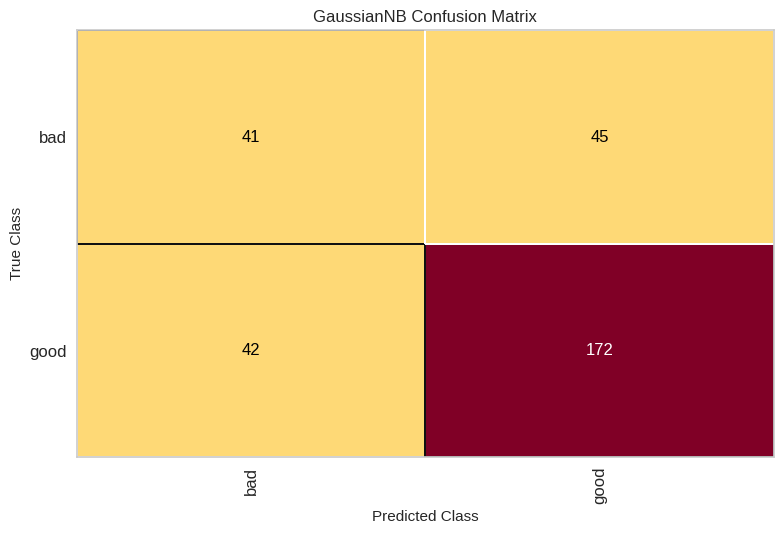

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [22]:
# podemos ver a matriz em forma de grafico
v = ConfusionMatrix(GaussianNB())
v.fit(x_treinamento,y_treinamento)
v.score(x_teste,y_teste)
v.poof()

In [48]:
# Vamos testar com um novo cliente 
# vamos importar outro arquivo .csv com somente um registro
novo_cliente = pd.read_csv('NovoCredit.csv')
novo_credito = novo_cliente.iloc[:,0:20].values # separando os dados previsores
#classe = novo_cliente.iloc[:,19].values # separando a classe de avaliação 



In [49]:
novo_credito # aqui esta o novo cliente 

array([["'no checking'", 12, "'existing paid'", 'radio/tv', 804, '<100',
        '>=7', 4, "'male single'", 'none', 4, 'car', 38, 'none', 'own',
        1, 'skilled', 1, 'none', 'yes']], dtype=object)

In [50]:
# vamos criar o mesmo padrão de antes 
# Criando e transformando os dados 
#criamos o objeto Label encoder  e passamos o dado categorico para ser transformado
# a diferença que entramos com o novo cliente para formatar

lbencoder1 = LabelEncoder()
novo_credito[:,0] = lbencoder1.fit_transform(novo_credito[:,0]) # pegamos a coluna checking_status

lbencoder2 = LabelEncoder()
novo_credito[:,2] = lbencoder2.fit_transform(novo_credito[:,2]) # pegamos a coluna credit_history

lbencoder3 = LabelEncoder()
novo_credito[:,3] = lbencoder3.fit_transform(novo_credito[:,3]) # pegamos a coluna purpose

lbencoder5 = LabelEncoder()
novo_credito[:,5] = lbencoder5.fit_transform(novo_credito[:,5]) # pegamos a coluna savings_status

lbencoder6 = LabelEncoder()
novo_credito[:,6] = lbencoder6.fit_transform(novo_credito[:,6])# pegamos a coluna personal_status

lbencoder8 = LabelEncoder()
novo_credito[:,8] = lbencoder8.fit_transform(novo_credito[:,8]) # pegamos a coluna savings_status

lbencoder9 = LabelEncoder()
novo_credito[:,9] = lbencoder9.fit_transform(novo_credito[:,9]) # pegamos a coluna savings_status

lbencoder11 = LabelEncoder()
novo_credito[:,11] = lbencoder11.fit_transform(novo_credito[:,11]) # pegamos a coluna savings_status

lbencoder13 = LabelEncoder()
novo_credito[:,13] = lbencoder13.fit_transform(novo_credito[:,13]) # pegamos a coluna savings_status

lbencoder14 = LabelEncoder()
novo_credito[:,14] = lbencoder14.fit_transform(novo_credito[:,14]) # pegamos a coluna savings_status

lbencoder16 = LabelEncoder()
novo_credito[:,16] = lbencoder16.fit_transform(novo_credito[:,16]) # pegamos a coluna savings_status

lbencoder18 = LabelEncoder()
novo_credito[:,18] = lbencoder18.fit_transform(novo_credito[:,18]) # pegamos a coluna savings_status

lbencoder19 = LabelEncoder()
novo_credito[:,19] = lbencoder19.fit_transform(novo_credito[:,19]) # pegamos a coluna savings_status


In [52]:
# agora chamamos o metodo predict para o modelo avaliar o novo cliente

nv.predict(novo_credito)

array(['good'], dtype='<U4')

In [ ]:
# pelo modelo o cliente foi avaliado como bom 